# Exercise 10: Hierarchical clustering of the grain data

In the video, you learnt that the SciPy `linkage()` function performs hierarchical clustering on an array of samples.  Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.  A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.


**Step 1:** Import:

 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.
 + `pandas`
 + `load_iris` and `train_test_split`

In [1]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris



**Step 2:** Load the dataset _(done for you)_.

In [2]:

iris_data = load_iris()


In [3]:
#Create pd DF the same way you did the first day
#Create the class and target columns and remove de cm from the columns names

def flatten(t):
    return [item for sublist in t for item in sublist]
    
def create_df():
    columns_names = [f.split('(')[0].strip() for f in iris_data.feature_names]
    columns_names.extend(['target','class'])
    data_values = [flatten([f, [iris_data.target[id],iris_data.target_names[iris_data.target[id]]]]) for id,f in enumerate(iris_data.data)]
    return pd.DataFrame(data_values,columns=columns_names)#
    
df_iris = create_df()
print(df_iris.head(2))


   sepal length  sepal width  petal length  petal width  target   class
0           5.1          3.5           1.4          0.2       0  setosa
1           4.9          3.0           1.4          0.2       0  setosa


In [4]:
assert df_iris['sepal length'].shape == (150,)
assert df_iris['sepal width'].shape == (150,)
assert df_iris['petal length'].shape == (150,)
assert df_iris['petal width'].shape == (150,)
assert df_iris['target'].shape == (150,)
assert df_iris['class'].shape == (150,)

In [5]:

#From our data we will only get variable columns as np.array

x = df_iris.drop(['target','class'],axis=1).values
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [6]:
assert x.shape == (150,4)

**Step 3:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'` keyword argument. Assign the result to `mergings`.

In [7]:
mergings = linkage(x, method='complete', metric='euclidean', optimal_ordering=False)

In [8]:
assert mergings.shape == (149,4)

**Step 4:** Plot a dendrogram using the `dendrogram()` function on `mergings`, specifying the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.  Remember to call `plt.show()` afterwards, to display your plot.

In [9]:
df_iris.drop(['target','class'],axis=1).columns.values

array(['sepal length', 'sepal width', 'petal length', 'petal width'],
      dtype=object)

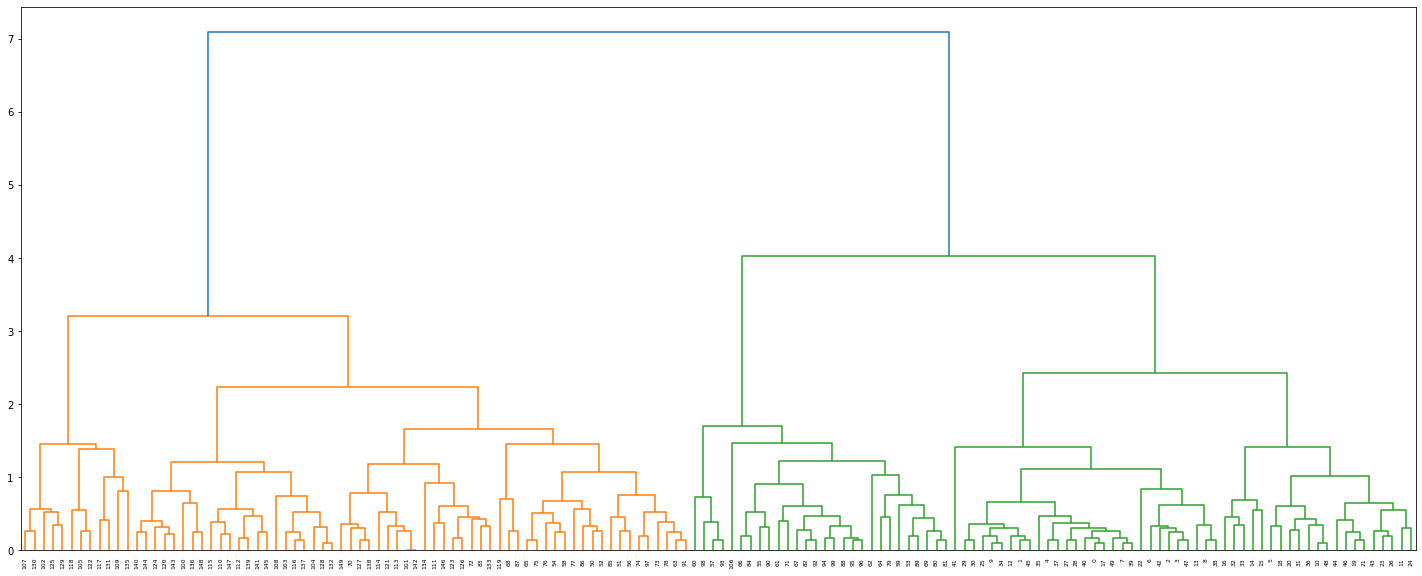

In [10]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(mergings,leaf_rotation=90,leaf_font_size=6)
plt.show()

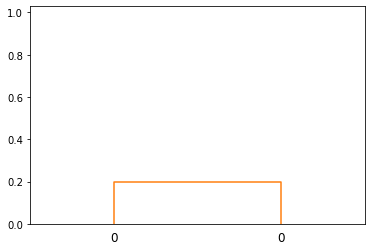

In [11]:
assert type(dn) == type(dendrogram(np.random.rand(15, 4)))

## K-MEANS

for this next part we will use the K-Means algorithm in order to cluster your data

**Step 1:** 
+ import `KMeans` from `sklearn.cluster`
+ loading our new datasets

In [12]:
from sklearn.cluster import KMeans

df = pd.read_csv('./02. Partitional Algorithms/datasets/ch1ex1.csv')
points = df.values

new_df = pd.read_csv('./02. Partitional Algorithms/datasets/ch1ex2.csv')
new_points = new_df.values

**Step 2:** Using `KMeans()`, create a `KMeans` instance called `model` to find `3` clusters. To specify the number of clusters, use the `n_clusters` keyword argument


In [13]:
model = KMeans(n_clusters=3)

In [14]:
assert type(model)== type(KMeans())

**Step 4:** Use the `.fit()` method of `model` to fit the model to the array of points `points`.

In [15]:
model.fit(points)

KMeans(n_clusters=3)

**Step 5:** Use the `.predict()` method of `model` to predict the cluster labels of `points`, assigning the result to `labels`.

In [16]:
labels = model.predict(points)
print(labels)

[0 2 1 1 2 2 1 0 2 2 1 0 2 1 2 0 1 1 0 1 2 0 2 0 0 2 0 0 0 2 1 1 1 2 0 2 0
 0 2 0 0 1 2 2 2 0 0 1 0 1 1 1 0 0 0 2 0 0 2 1 2 0 0 1 1 2 1 2 2 0 1 2 1 0
 1 2 0 0 0 1 0 2 1 2 2 2 2 0 0 1 2 1 2 0 0 0 1 2 2 1 2 0 2 1 0 1 1 1 2 2 0
 2 1 2 2 2 0 2 1 1 0 0 0 0 0 2 1 0 2 2 1 1 2 0 2 0 1 2 1 0 1 1 0 1 1 0 1 2
 0 0 0 1 1 2 1 2 0 0 1 2 1 1 1 2 0 0 2 1 1 0 0 1 0 0 2 0 1 1 1 0 0 1 0 1 1
 0 2 1 0 0 0 0 2 1 0 2 2 2 0 2 0 0 2 1 1 0 1 0 0 2 2 0 1 2 1 0 1 2 0 2 2 2
 2 1 1 1 0 0 2 0 1 2 0 0 2 0 1 1 1 1 1 2 0 0 1 1 0 2 1 2 2 0 0 2 2 2 0 1 0
 2 0 1 1 1 1 1 0 0 2 0 0 2 1 1 2 0 1 1 2 2 0 0 0 2 2 0 1 2 2 1 0 0 0 2 0 0
 0 2 2 2]


In [17]:
assert labels[labels.argmax()] == 2
assert labels.shape == (300,)

In [18]:
# Make a function that returns 3 numpy arrays each one with the points associated for each class
#If the label is 0 they go into data_0
#If the label is 1 they go into data_1
#If the label is 2 they go into data_2
def separate_labels(labels, points):
    data = [[],[],[]]
    for id,l in enumerate(labels):
        data[l].append(list(points[id]))
    return np.array(data[0]), np.array(data[1]), np.array(data[2])

data_0, data_1, data_2 = separate_labels(labels, points)


In [19]:
assert abs(data_0.shape[0] - 94) <= 20
assert abs(data_1.shape[0] - 95) <= 20
assert abs(data_2.shape[0] - 111) <= 20

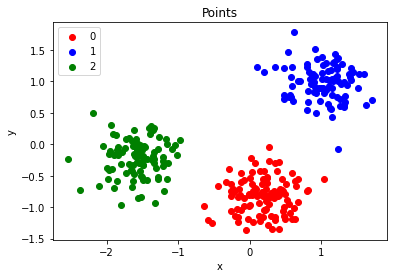

In [20]:
# plotting the data 
def make_plot(data_0,data_1,data_2):
    plt.scatter(x=data_0[:,0],y=data_0[:,1],color='r',label='0')
    plt.scatter(x=data_1[:,0],y=data_1[:,1],color='b',label='1')
    plt.scatter(x=data_2[:,0],y=data_2[:,1],color='g',label='2')
    plt.legend()
    plt.xlabel('x');
    plt.ylabel('y');
    plt.title('Points');

make_plot(data_0,data_1,data_2)

**Step 7:** Use the `.predict()` method of `model` to predict the cluster labels of `new_points`, assigning the result to `new_labels`.  Notice that KMeans can assign previously unseen points to the clusters it has already found!

In [21]:
new_labels = model.predict(new_points)
print(new_labels)

[1 1 2 2 0 0 1 0 0 2 0 0 2 0 1 1 0 1 1 0 1 1 2 1 2 0 2 1 1 1 2 0 0 2 2 1 2
 2 2 2 1 0 2 0 2 2 0 1 2 2 1 1 0 1 0 1 2 1 2 2 2 0 0 0 2 2 0 2 0 2 1 1 1 0
 2 0 0 0 1 0 1 0 1 0 1 2 1 0 2 0 1 1 2 2 1 1 1 2 0 2]


In [22]:
assert new_labels[new_labels.argmax()] == 2
assert new_labels.shape == (100,)

In [23]:
#separate the data by labels like we did before

new_0, new_1, new_2 = separate_labels(new_labels, new_points)


In [24]:
assert abs(new_0.shape[0] - 34) <= 5
assert abs(new_1.shape[0] - 34) <= 5
assert abs(new_2.shape[0] - 34) <= 5

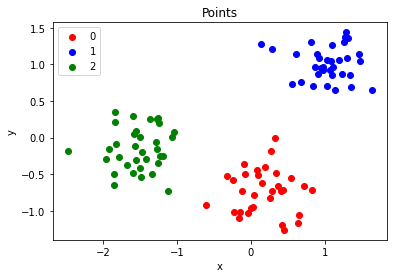

In [25]:
#plot the new labels
make_plot(new_0,new_1,new_2)

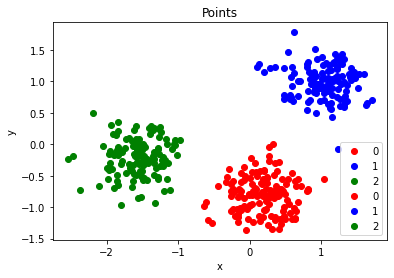

In [26]:
#plot all the points together
make_plot(data_0,data_1,data_2)
make_plot(new_0,new_1,new_2)